<a href="https://colab.research.google.com/github/Rafae1130/flower-classification/blob/main/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os 
import cv2
import numpy as np

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
import matplotlib.pyplot as plt


In [12]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ML projects/flowers'  #change dir to your project folder

Mounted at /content/gdrive


In [13]:
size=128
data=[]
label=[]

for folder in os.listdir(root_path):
  for file in os.listdir(os.path.join(root_path, folder)):
    if file.endswith('jpg'):
      label.append(folder)
      img=cv2.imread(os.path.join(root_path, folder, file))
      img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      im=cv2.resize(img_rgb,(size,size))
      data.append(im)
    else:
      continue

In [14]:
data_arr=np.array(data)
label_arr=np.array(label)

In [15]:
encoder=LabelEncoder()

In [16]:
y=encoder.fit_transform(label_arr)

In [17]:
y=to_categorical(y,5)

In [18]:
data=data_arr/255

In [19]:
X_train, x_test, Y_train, y_test= train_test_split(data, y, test_size=0.2, random_state=10)

In [20]:
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu',input_shape=(size,size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='Softmax'))

In [21]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [22]:
np.shape(X_train)

(3453, 128, 128, 3)

In [23]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/64
108/108 [==============================] - 29s 167ms/step - loss: 1.4739 - accuracy: 0.3304 - val_loss: 1.2489 - val_accuracy: 0.4850
Epoch 2/64
108/108 [==============================] - 16s 152ms/step - loss: 1.3385 - accuracy: 0.4211 - val_loss: 1.2857 - val_accuracy: 0.4792
Epoch 3/64
108/108 [==============================] - 16s 152ms/step - loss: 1.2915 - accuracy: 0.4474 - val_loss: 1.1897 - val_accuracy: 0.5012
Epoch 4/64
108/108 [==============================] - 16s 151ms/step - loss: 1.2341 - accuracy: 0.4744 - val_loss: 1.1062 - val_accuracy: 0.5567
Epoch 5/64
108/108 [==============================] - 18s 168ms/step - loss: 1.1817 - accuracy: 0.5138 - val_loss: 1.1220 - val_accuracy: 0.5613
Epoch 6/64
108/108 [==============================] - 16s 152ms/step - loss: 1.1500 - accuracy: 0.5381 - val_loss: 1.0294 - val_accuracy: 0.6111
Epoch 7/64
108/108 [==============================] - 16s 152ms/step - loss: 1.1009 - accuracy: 0.5772 - val_loss: 0.9723 - val_ac

In [24]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

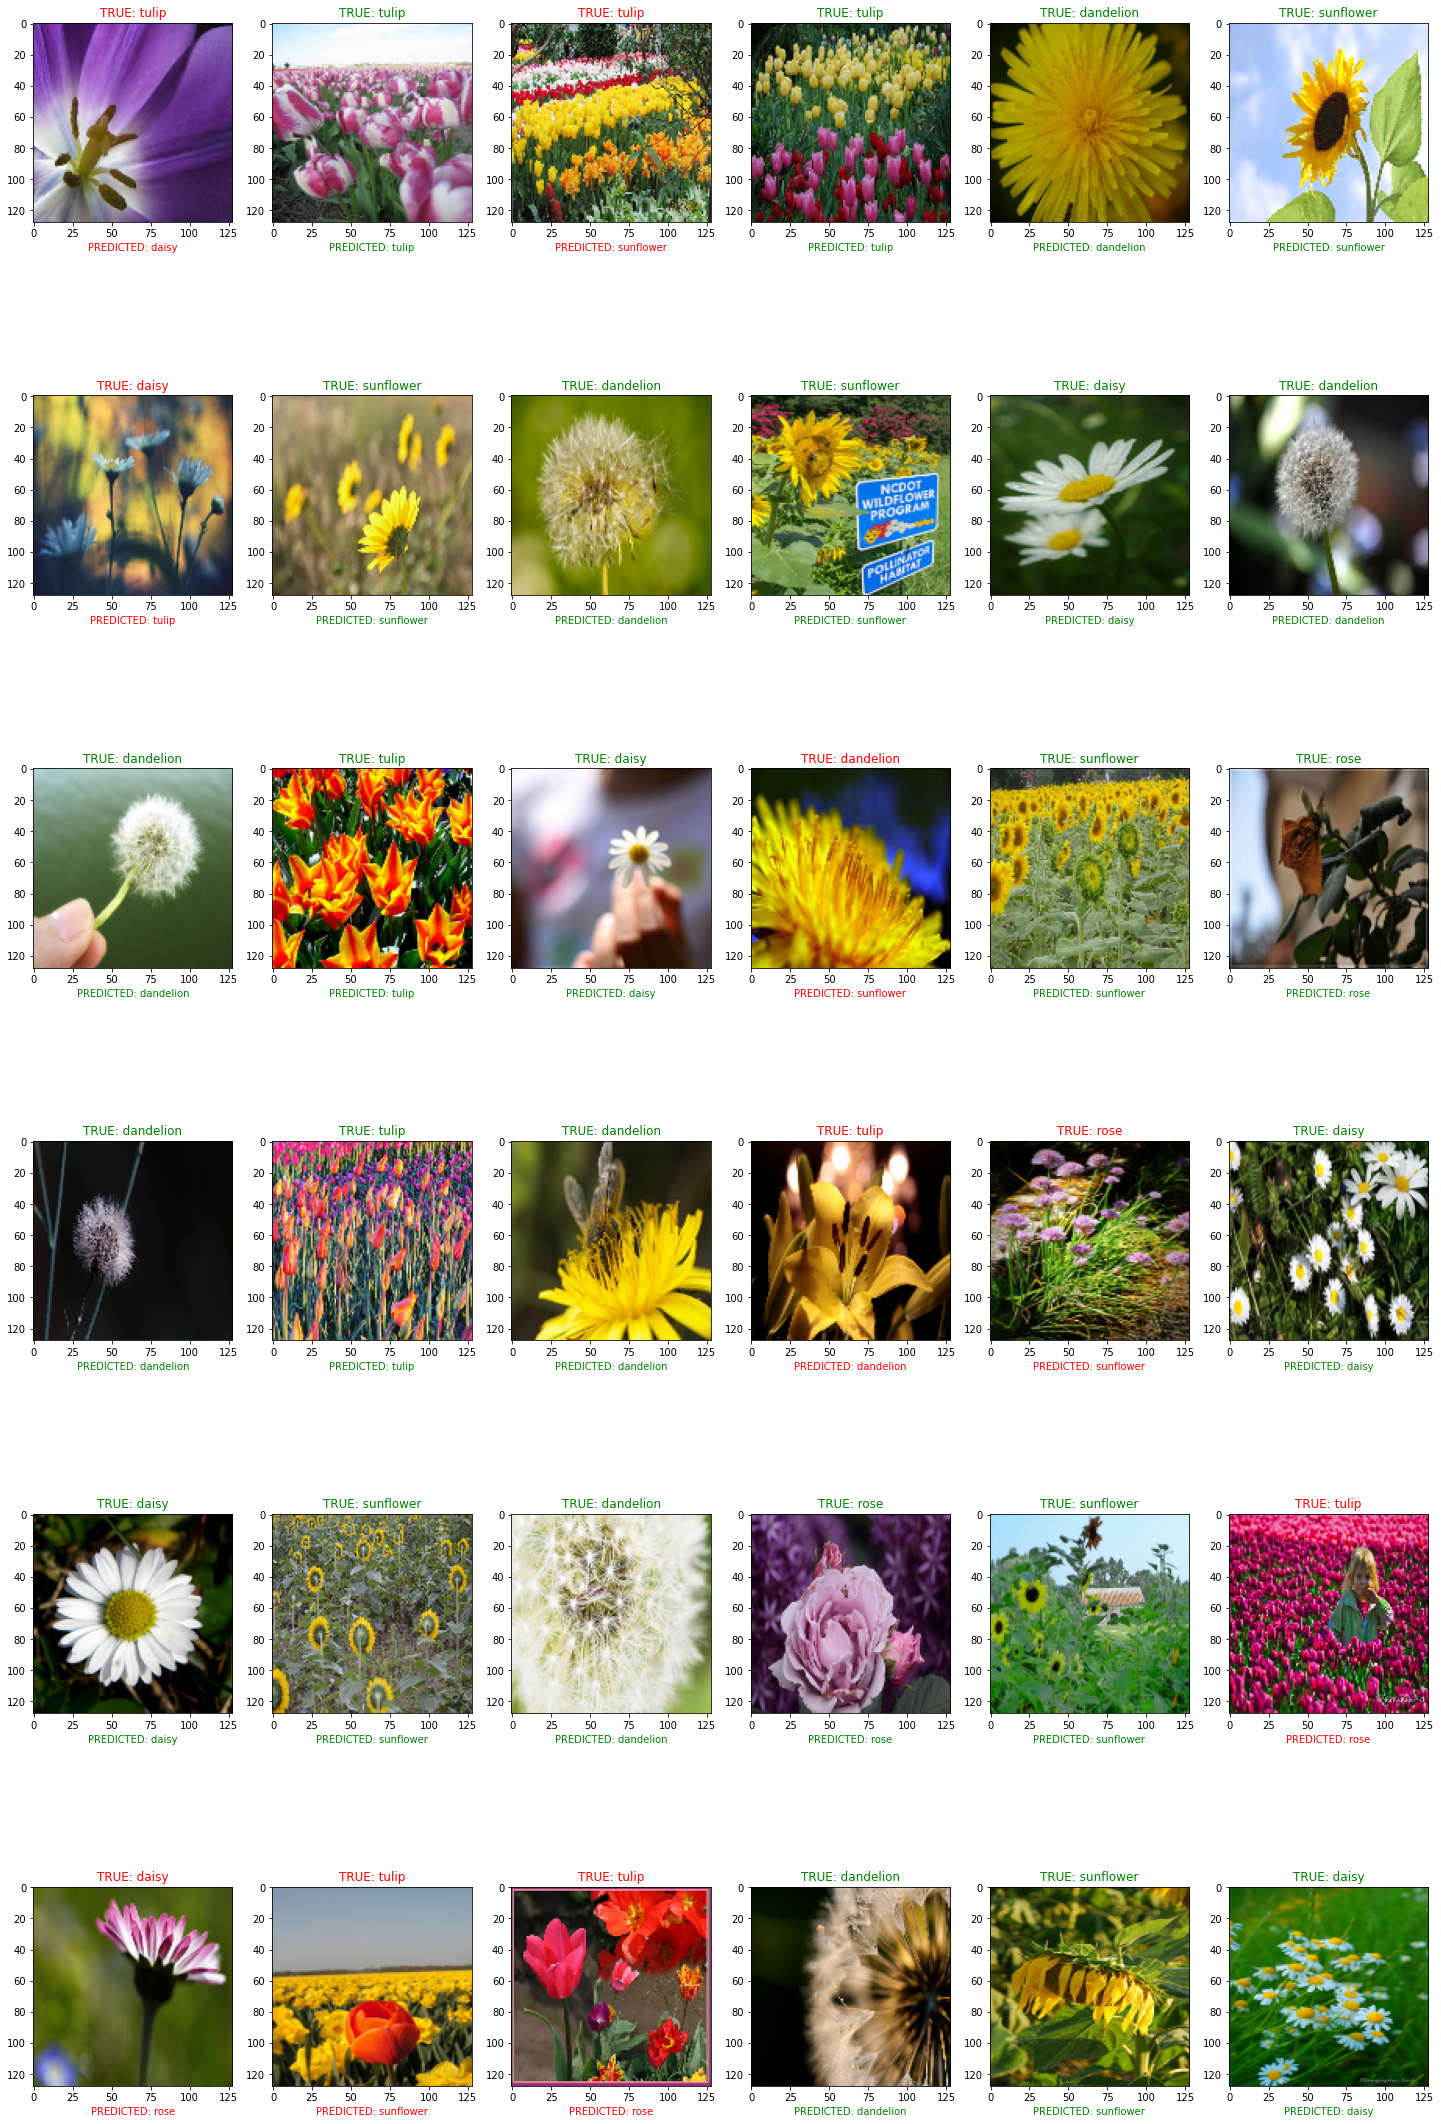

In [42]:
categories=np.sort(os.listdir(root_path))
fig, ax= plt.subplots(6,6, figsize=(25, 40))
for i in range(6):
  for j in  range(6):
    k = int(np.random.random_sample()*len(x_test))
    if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
      ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
      ax[i,j].imshow(np.array(x_test)[k].reshape(size, size, 3), cmap='gray')
    else:
      ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
      ax[i,j].imshow(np.array(x_test)[k].reshape(size, size, 3), cmap='gray')


In [37]:

k

0